# Visualization 

This homework will focus on data visualization.
You will be using three libraries : matplotlib, seaborn and wordcloud 

Two datasets : prices.csv and Tweets.csv.

115 Pts total.



#### Question 1:
import all libraries needed Libraries 
matplotlib
seaborn
wordcloud
numpy
pandas

2 pts

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

     |████████████████████████████████| 366 kB 18.8 MB/s eta 0:00:01


#### Question 2: Load dataset : prices.csv

3 pts

In [2]:
prices = pd.read_csv("s3://amal-ds5110/prices.csv")
prices

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Question 3: Plot horsepower against city-mpg : Make sure you sort the data by horsepower before plotting

10Pts

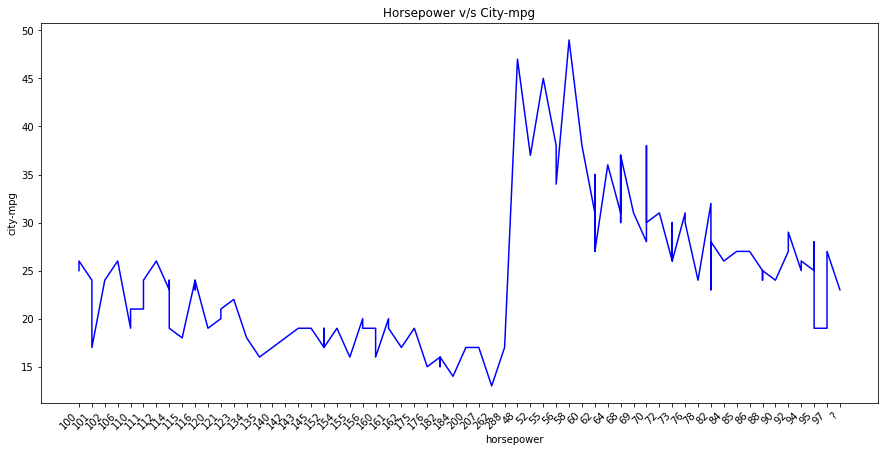

In [3]:
plt.figure(figsize=(15,7))
prices.sort_values(by=['horsepower'], inplace=True)
plt.plot(prices["horsepower"], prices["city-mpg"],color='Blue')
plt.xlabel('horsepower', horizontalalignment='right', x=0.6)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('city-mpg')
plt.title('Horsepower v/s City-mpg')
plt.show()

##### Question 4: Scatter plot between horsepower and peak-rpm
5 Pts

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


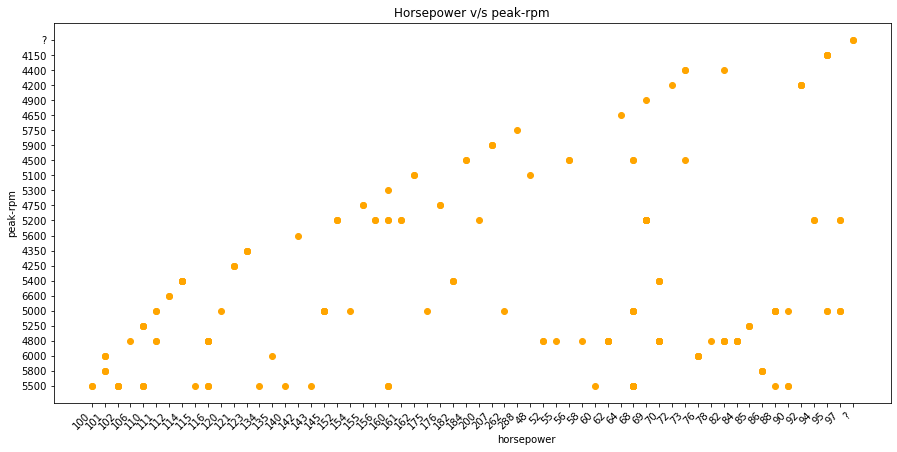

In [4]:
plt.figure(figsize=(15,7))
plt.scatter(prices["horsepower"], prices["peak-rpm"], Color = 'Orange')
plt.xlabel('horsepower', horizontalalignment='right', x=0.6)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('peak-rpm')
plt.title('Horsepower v/s peak-rpm')
plt.show()

#### Question 5: Plot histogram of highway-mpg
5pts

Text(0.5, 0, 'highway-mpg')

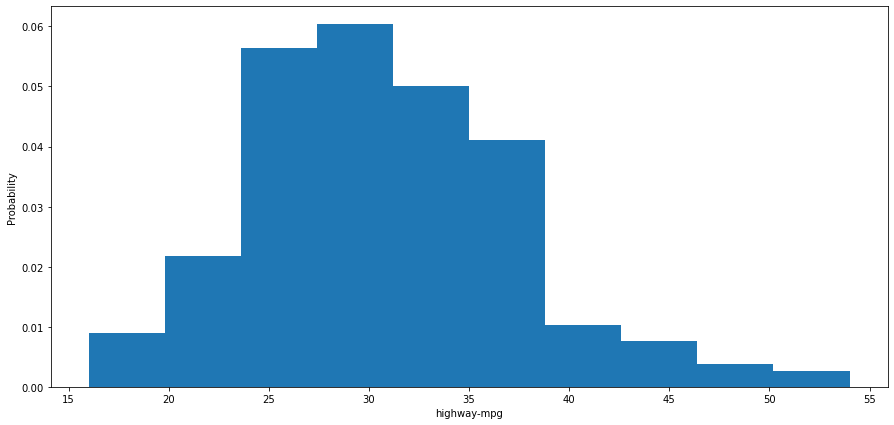

In [5]:
plt.figure(figsize=(15,7))
plt.hist(prices["highway-mpg"], density=True)
plt.ylabel('Probability')
plt.xlabel('highway-mpg')

#### Question 6: Now make the histogram a little better - indicate what is on the x axis ( = mpg) and on yaxis (= No of vehicles) and give a title to the graph

5 Pts

Text(0.5, 1.0, 'Distribution of Miles per gallon')

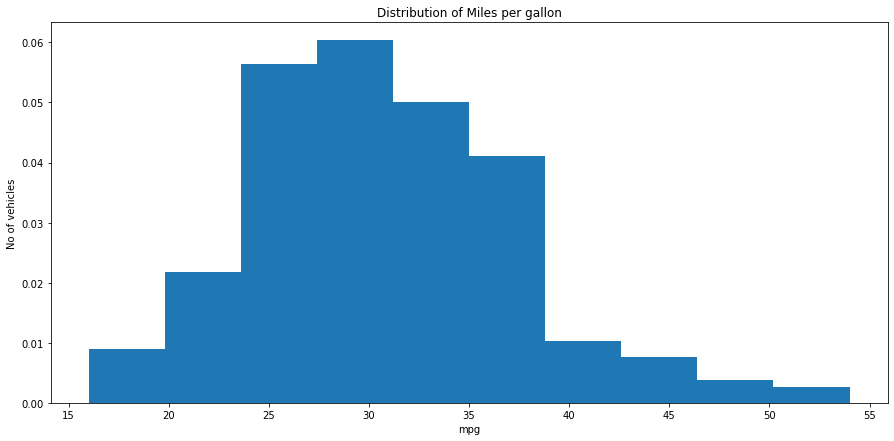

In [6]:
plt.figure(figsize=(15,7))
plt.hist(prices["highway-mpg"], density=True)
plt.ylabel('No of vehicles')
plt.xlabel('mpg')
plt.title('Distribution of Miles per gallon')

#### Question 7: On the comparison between highway-mpg and horsepower , plot the distribution using KDE.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html
    
These are called density plots. Based on your plot, explain what you found. 
15 Pts

<AxesSubplot:xlabel='highway-mpg', ylabel='Density'>

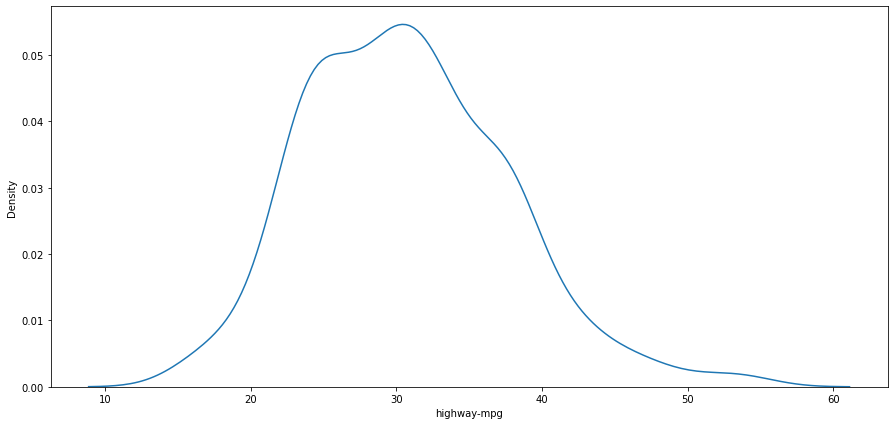

In [7]:
plt.figure(figsize=(15,7))
df = pd.DataFrame(prices,columns=["horsepower","highway-mpg"])
sns.kdeplot(data=prices, x = "highway-mpg")

In [8]:
prices["horsepower"] = prices["horsepower"].str.replace('?','')
prices["horsepower"] = pd.to_numeric(prices["horsepower"])

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

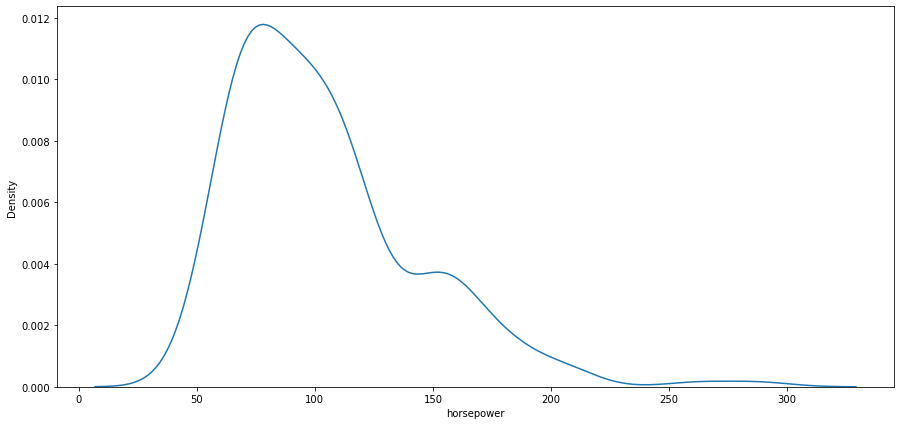

In [9]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=prices, x = prices["horsepower"])

Observations:
1. First highway-mpg is a numeric (int) data type whereas horsepower is an object data type so to plot density plot it needs to be converted into numeric (int)
2. In highway-mpg, data points are populated more between 20-40 whereas for horsepower it is populated between 50-150

#### Question 8: given two lists such as 
group1 = [1, 1, 1, 2, 2, 3, 4]
group2 = [2, 2, 2, 1, 1, 3, 1, 4]

plot them into 4 bins where each bin accounts for the number of elements in that bin
example: 1 : group1 has 3 and group2 has 2 
         2 : group1 has 2 and group2 has 3
                

Consider the following groups for your plot
group1 = ["potter", "potter", "potter", "granger", "granger", "weasley", "dumbledore", "Mcgonagall", "potter"]
group2 = ["potter", "weasley", "dumbledore", "dumbledore", "dumbledore", "granger", "granger", "granger"] 

10 Pts

In [10]:
group1 = ["potter", "potter", "potter", "granger", "granger", "weasley", "dumbledore", "Mcgonagall", "potter"] 
group2 = ["potter", "weasley", "dumbledore", "dumbledore", "dumbledore", "granger", "granger", "granger"]

(array([[4., 2., 1., 2.],
        [1., 3., 1., 3.]]),
 array([0., 1., 2., 3., 4.]),
 <a list of 2 BarContainer objects>)

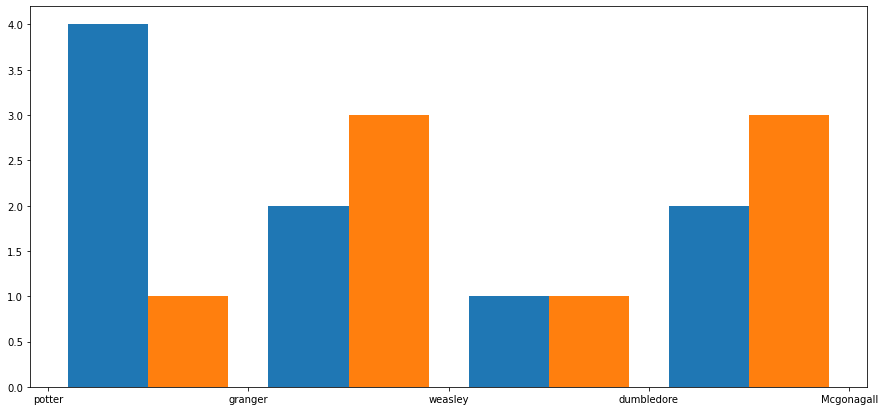

In [11]:
group_bin = (group1,group2)
plt.figure(figsize=(15,7))
plt.hist(group_bin, bins = 4)

#### Question 9: Exploration using another library called seaborn
    
Draw the boxplot using x = drive-wheels , y = city-mpg and hue=num-of-doors.

Look at hte box plot and explain the plot.
https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/
15 Pts

<AxesSubplot:xlabel='drive-wheels', ylabel='highway-mpg'>

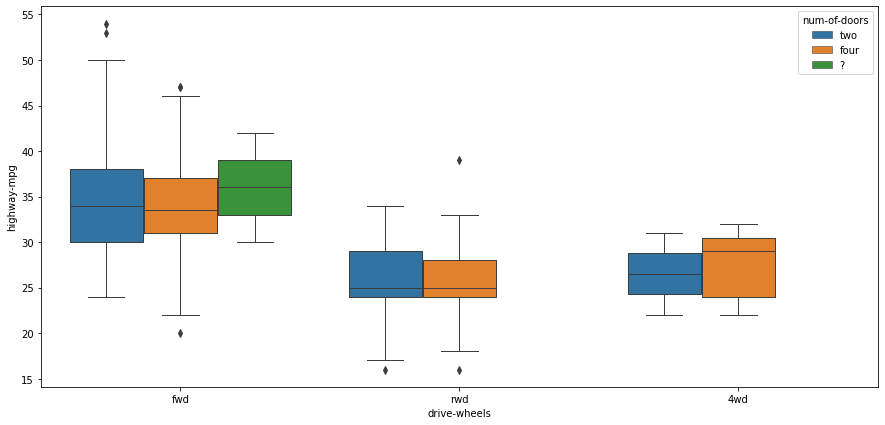

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(x="drive-wheels", y="highway-mpg", hue="num-of-doors",
                 data=prices, linewidth=1, dodge=True)

In above graph, we have plotted wheel drive against highway mileage with differentiation based on number of doors for each wheeldrive. 
1. For FWD, we have one additional category "?" which is basically missing value and can be ignored. It also shows that FWD with 2 door category has more interquartile range and outliers than FWD with 4 door. It also has median around 34 for FWD with 2 door and 33 for FWD with 4 door
2. For RWD, it has almost same median and interquartile range
3. For 4WD with 2 door has median between 25-30 and less interquartile range whereas 4WD with 4 door has more interquartile range and median closer to 30

#### Question 10: Stripplot

Use seaborn and plot the distribution using a stripplot.
x = drive-wheels
y = city-mpg
hue = num-of-doors

using the stripplot, identify how many fwd wheel cars are there who have mileage greater than 42mpg.

10 Pts


<AxesSubplot:xlabel='drive-wheels', ylabel='city-mpg'>

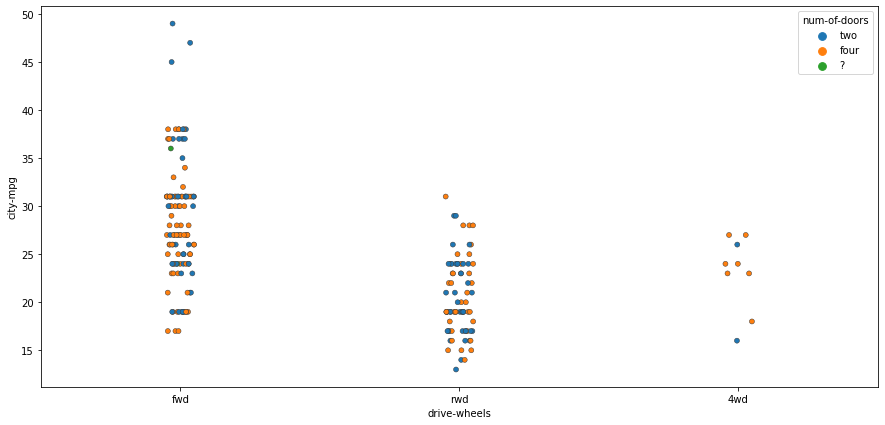

In [13]:
plt.figure(figsize=(15,7))
sns.stripplot(x="drive-wheels", y="city-mpg", hue = "num-of-doors", data=prices,
                   linewidth=0.5, jitter=0.05)

We have 3 cars in FWD with mpg > 42 as per stripplot shown above.

<AxesSubplot:xlabel='drive-wheels', ylabel='city-mpg'>

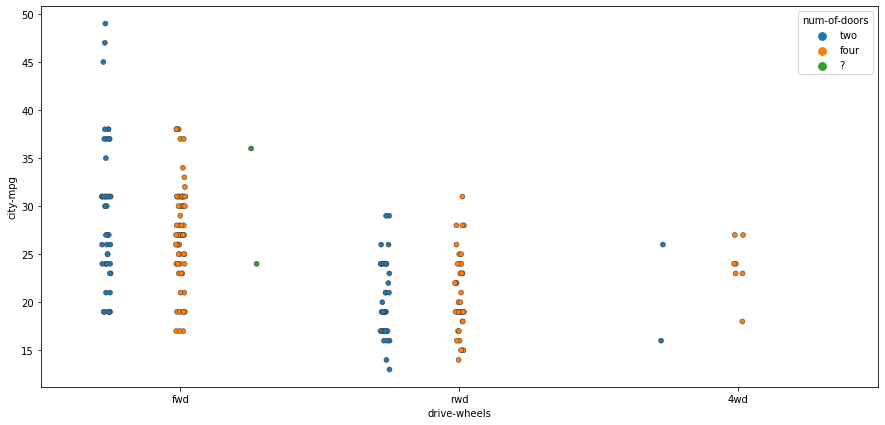

In [14]:
plt.figure(figsize=(15,7))
sns.stripplot(x="drive-wheels", y="city-mpg", hue = "num-of-doors", data=prices,
                   linewidth=0.5, jitter=0.05, dodge=True)

<AxesSubplot:xlabel='drive-wheels', ylabel='city-mpg'>

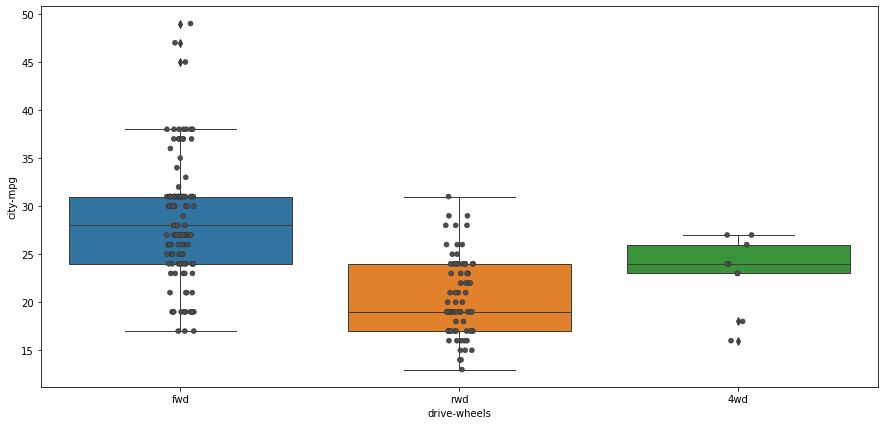

In [15]:
plt.figure(figsize=(15,7))
sns.boxplot(x="drive-wheels", y="city-mpg",
                 data=prices, linewidth=1)
sns.stripplot(x="drive-wheels", y="city-mpg", data=prices,
                   linewidth=0.5, jitter=0.05, color=".3")

#### Question 11: jointplot

use seaborn to plot a jointplot between city-mpg and highway-mpg . Where is the correlation the most ? use kind = 'hex'

https://seaborn.pydata.org/generated/seaborn.jointplot.html

15 pts

<Figure size 1080x504 with 0 Axes>

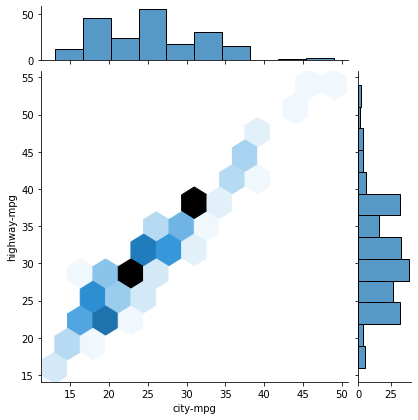

In [16]:
plt.figure(figsize=(15,7))
sns.jointplot(data=prices, x="city-mpg", y="highway-mpg", kind="hex",  marginal_ticks=True)

Based on Jointplot, It can be figured that coorelation is maximum at 2 points:
1. Where City-mpg between 20-25 & highway-mpg is closer to 30. It is represented in Darkblue color.
2. Where City-mpg between 30-35 & highway-mpg is between 35-40. It is represented in Darkblue color.

#### Question 12: plot pairplot for prices

5 pts

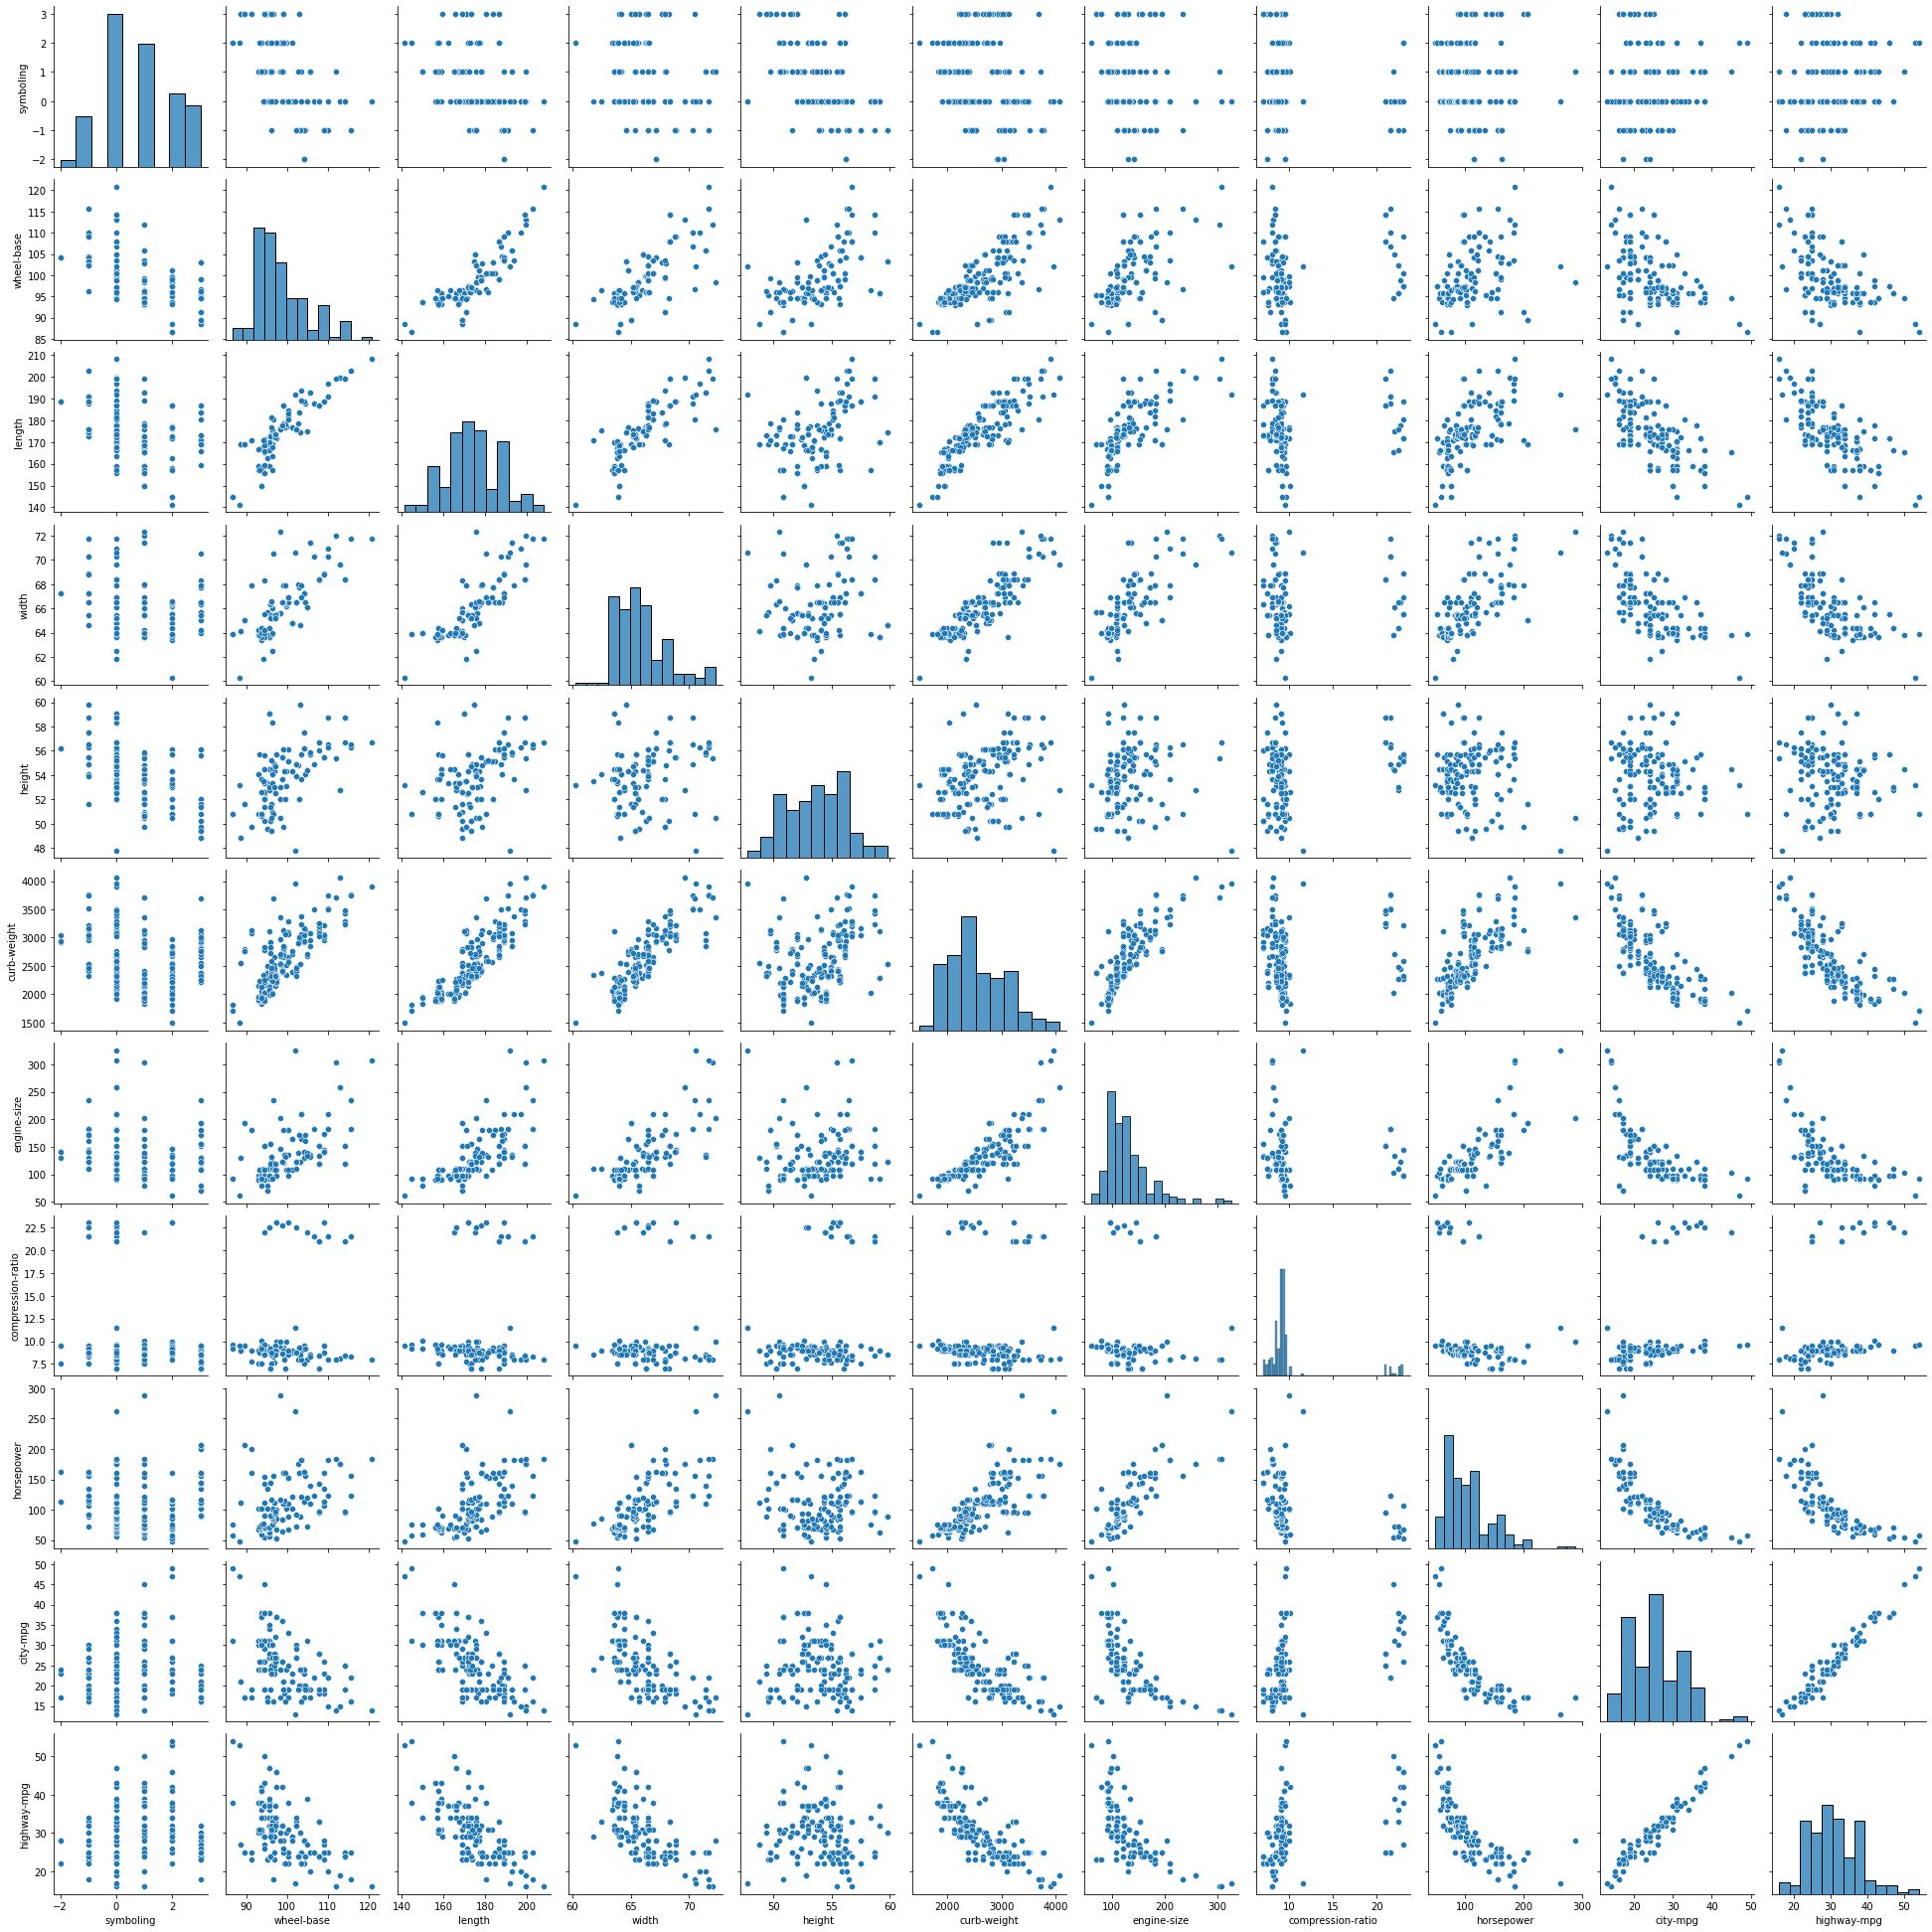

In [17]:
sns.pairplot(prices)

In [18]:
from wordcloud import WordCloud, STOPWORDS

tweets = pd.read_csv(r"s3://amal-ds5110/Tweets.csv")
tweets.columns

comment_words = ''
stopwords = set(STOPWORDS)
text = tweets.text.values
for val in text:
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

#### Question 13 : given comment_words, plot the wordcloud using the wordcloud library. give the top 5 words in the cloud.

15 pts

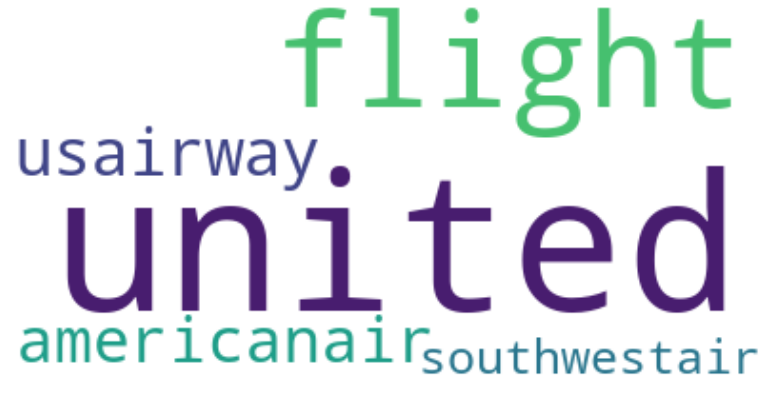

In [19]:
wordcloud = WordCloud(max_font_size=100, max_words=5, background_color="white").generate(comment_words)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()